## Analyze Supermarket Data Across the Country - Company XYZ

<img src="xyz.png" width="500" height="300">

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this link

## Loading Datasets

### Import libraries

In [1]:
import os
import glob
import pandas as pd
# os.chdir()

In [2]:
# put all the files into a single list
extension = 'csv'
all_filenames = [i for i in glob.glob('*Branch.{}'.format(extension))]

In [3]:
all_filenames

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

In [4]:
# Combined all files in the list
combined_files = pd.concat([pd.read_csv(f) for f in all_filenames])

In [5]:
combined_files

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,35985.6,7,12594.96,264494.16,1/23/2019,10:33,Cash,251899.2,4.761905,12594.96,6.1
324,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,34693.2,7,12142.62,254995.02,1/9/2019,11:40,Cash,242852.4,4.761905,12142.62,6.0
325,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,29642.4,10,14821.20,311245.20,3/29/2019,19:12,Epay,296424.0,4.761905,14821.20,4.3
326,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,21942.0,1,1097.10,23039.10,2/18/2019,11:40,Epay,21942.0,4.761905,1097.10,5.9


In [6]:
combined_files.City.unique()

array(['Abuja', 'Lagos', 'Port Harcourt'], dtype=object)

In [7]:
# It shows that our combined csv file now has all the 3 locations
# we can now export it to csv

In [8]:
combined_files.to_csv('combined_files.csv', index=False)

In [9]:
# import the combined csv file back for analysis

In [10]:
data = pd.read_csv('combined_files.csv')

## Data Exploration

### Import libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [12]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [13]:
data.shape

(1000, 17)

In [14]:
# data has 1000 rows with 17 features(columns)

In [15]:
# Check column names
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [16]:
# Statistical summary for the dataset
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.220360e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


### Observation

- Minimun and maximum rating is 4 and 10 respectively
- Tax and gross income look statistically alike

In [17]:
# check missing values in the dataset
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [18]:
# We have no missing value

In [19]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 132.9+ KB


## Dealing with DateTime Features

In [20]:
import datetime as dt

In [21]:
data['Date'] = pd.to_datetime(data['Date'])

In [22]:
data['Date'].head()

0   2019-02-20
1   2019-02-06
2   2019-03-09
3   2019-01-15
4   2019-03-11
Name: Date, dtype: datetime64[ns]

In [23]:
# data['Time'] = pd.to_datetime(data['Time']).dt.time

In [24]:
from datetime import time
data['Time'] = pd.to_datetime(data['Time'])

In [25]:
data['Time'].head()

0   2021-02-07 13:27:00
1   2021-02-07 18:07:00
2   2021-02-07 17:03:00
3   2021-02-07 16:19:00
4   2021-02-07 15:30:00
Name: Time, dtype: datetime64[ns]

In [26]:
# Extract day column
data['Day']  = data['Date'].dt.day

In [27]:
# Extract month column
data['Month'] = data['Date'].dt.month

In [28]:
# Extract year column
data['Year'] = data['Date'].dt.year

In [29]:
# Extract the hour column
data['Hour'] = data['Time'].dt.hour

In [30]:
# No of unique hours of sales in the supermarket
data['Hour'].nunique()

11

In [31]:
# Unique hours of sales in the supermarket
data['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Unique Values in Columns

In [32]:
categorical_columns = [col for col in data.columns if data[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [33]:
print("Total Number of unique values in the Branch Column : {}". format(len(data['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [34]:
print("Total Number of unique values in the City Column : {}". format(len(data['City'].unique().tolist())))

Total Number of unique values in the City Column : 3


In [35]:
print("Total Number of unique values in the Customer type Column : {}". format(len(data['Customer type'].unique().tolist())))

Total Number of unique values in the Customer type Column : 2


In [36]:
print("Total Number of unique values in the Gender Column : {}". format(len(data['Gender'].unique().tolist())))

Total Number of unique values in the Gender Column : 2


In [37]:
print("Total Number of unique values in the product line Column : {}". format(len(data['Product line'].unique().tolist())))

Total Number of unique values in the product line Column : 6


In [38]:
print("Total Number of unique values in the Payment Column : {}". format(len(data['Payment'].unique().tolist())))

Total Number of unique values in the Payment Column : 3


In [39]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [40]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [41]:
data['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

In [42]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [43]:
data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [44]:
data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [45]:
data['Payment'].value_counts()

Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64

## Aggregration with GroupBy

In [46]:
cities = data.groupby('City')

In [47]:
pd.set_option('display.max_columns',None)
cities.agg([np.sum, np.mean])

Unit price               Quantity                Tax 5%  \
                     sum          mean      sum      mean         sum   
City                                                                    
Abuja          6652396.8  20037.339759     1820  5.481928  1820531.52   
Lagos          6705176.4  19721.107059     1859  5.467647  1820577.78   
Port Harcourt  6684393.6  20379.248780     1831  5.582317  1895463.54   

                                  Total                       cogs  \
                      mean          sum           mean         sum   
City                                                                 
Abuja          5483.528675  38231161.92  115154.102169  36410630.4   
Lagos          5354.640529  38232133.38  112447.451118  36411555.6   
Port Harcourt  5778.852256  39804734.34  121355.897378  37909270.8   

                             gross margin percentage           gross income  \
                        mean                     sum      mean          sum   
City                                                                          
Abuja          109670.573494             1580.952381  4.761905   1820531.52   
Lagos          107092.810588             1619.047619  4.761905   1820577.78   
Port Harcourt  115577.045122             1561.904762  4.761905   1895463.54   

                            Rating             Day            Month            \
                      mean     sum      mean   sum       mean   sum      mean   
City                                                                            
Abuja          5483.528675  2263.6  6.818072  5068  15.265060   665  2.003012   
Lagos          5354.640529  2389.2  7.027059  5232  15.388235   688  2.023529   
Port Harcourt  5778.852256  2319.9  7.072866  4956  15.109756   640  1.951220   

                 Year        Hour             
                  sum  mean   sum       mean  
City                                          
Abuja          670308  2019  5029  15.147590  
Lagos          686460  2019  4987  14.667647  
Port Harcourt  662232  2019  4894  14.920732

In [48]:
 cities.agg({'gross income':['sum', 'mean']})

gross income             
                       sum         mean
City                                   
Abuja           1820531.52  5483.528675
Lagos           1820577.78  5354.640529
Port Harcourt   1895463.54  5778.852256

- Port Harcourt has the highest total gross income, reason for its highest tax
- Lagos has the highest total unit price, quantity and rating
- Abuja has the lowest total rating
- Port Harcourt paid the highest tax while Lagos paid the least

## Data Visualization

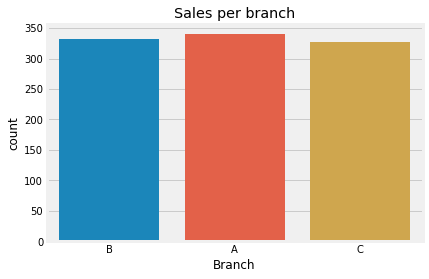

In [49]:
sns.countplot('Branch', data=data).set_title('Sales per branch');

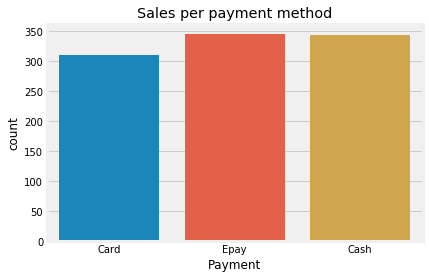

In [50]:
sns.countplot('Payment', data=data).set_title('Sales per payment method');

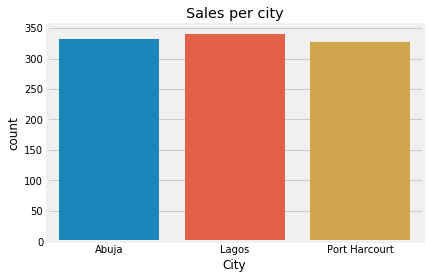

In [51]:
sns.countplot('City', data=data).set_title('Sales per city');

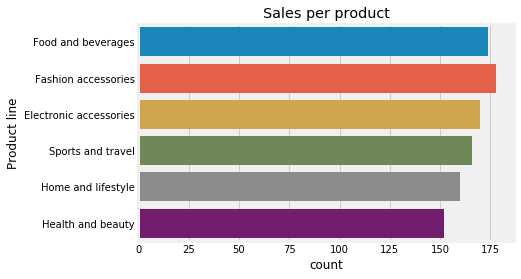

In [52]:
sns.countplot(y ='Product line', data=data).set_title('Sales per product');

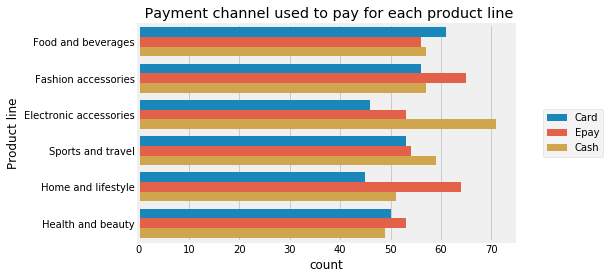

In [53]:
g =sns.countplot(y='Product line',hue='Payment',data=data).set_title(' Payment channel used to pay for each product line')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

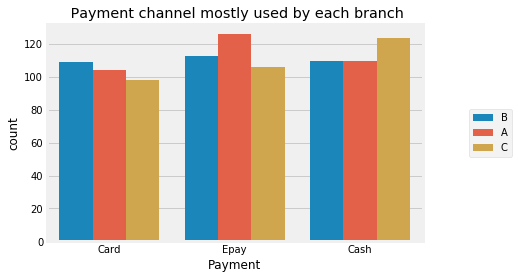

In [54]:
g =sns.countplot(x='Payment',hue='Branch',data=data).set_title(' Payment channel mostly used by each branch')
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

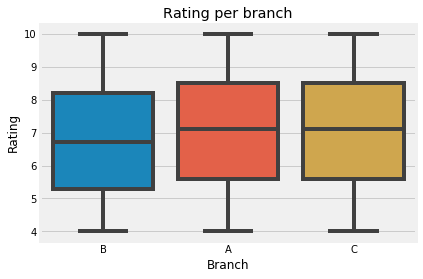

In [55]:
sns.boxplot('Branch', 'Rating', data=data).set_title('Rating per branch');

- Branch B (Abuja) has the lowest rating

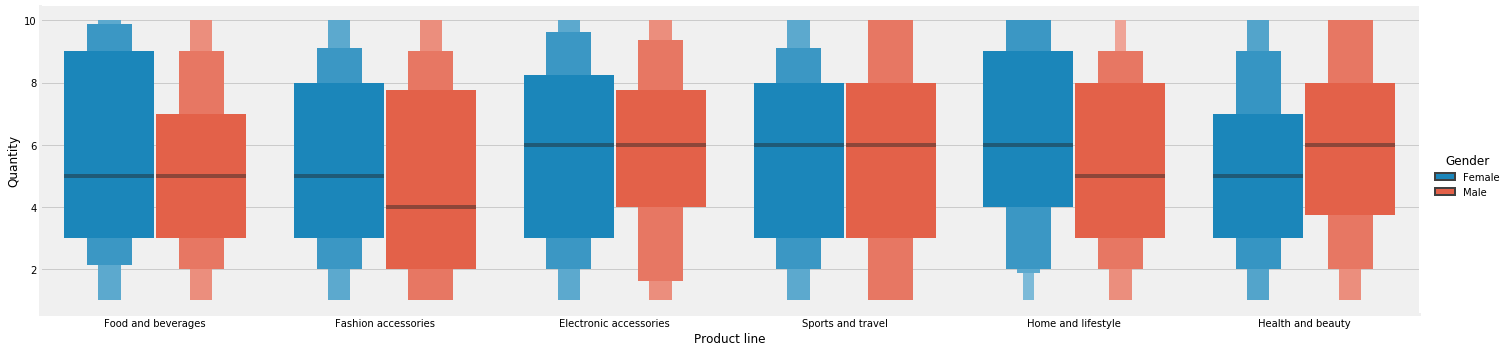

In [56]:
sns.catplot('Product line', 'Quantity', data=data, hue='Gender', kind='boxen', aspect=4) 
#"point", "bar", "strip", "swarm","box", "violin", or "boxen".

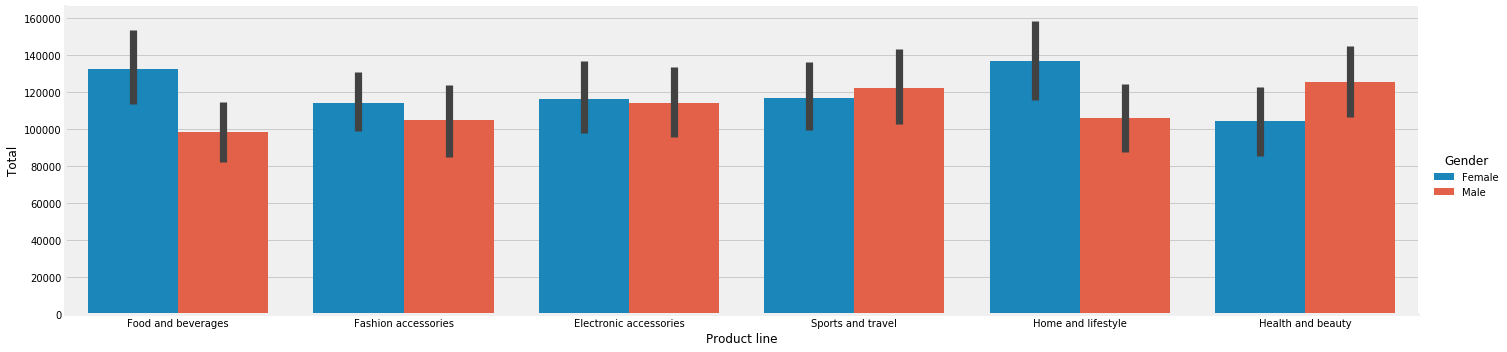

In [57]:
sns.catplot('Product line', 'Total', data=data, hue='Gender', kind='bar', aspect=4)

### Insights
- On average, Females buy more of Fashion accessories & Home and lifestyle than males
- Also, males buy more of Health and beauty
- The other three product lines (ood and beverages, sports and travel & Electronic accessories) appear equally distributed among the two genders


- Females spend more on Food and beverages , Fashion accessories & Home and lifestyle than males
- Males spend more on Health and beauty  & sports and travel than females
- Seems both gender spend equally on Electronic accessories  

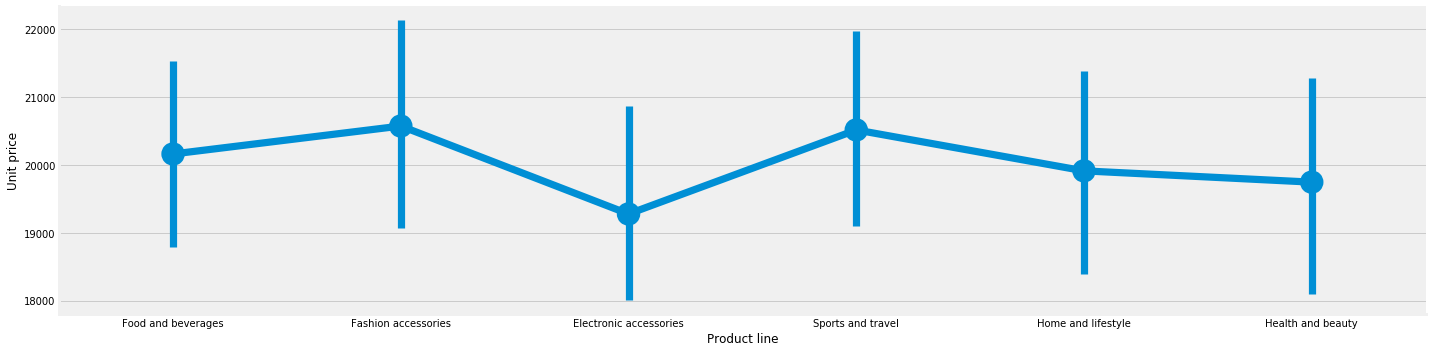

In [58]:
sns.catplot('Product line', 'Unit price', data=data, aspect=4, kind='point')

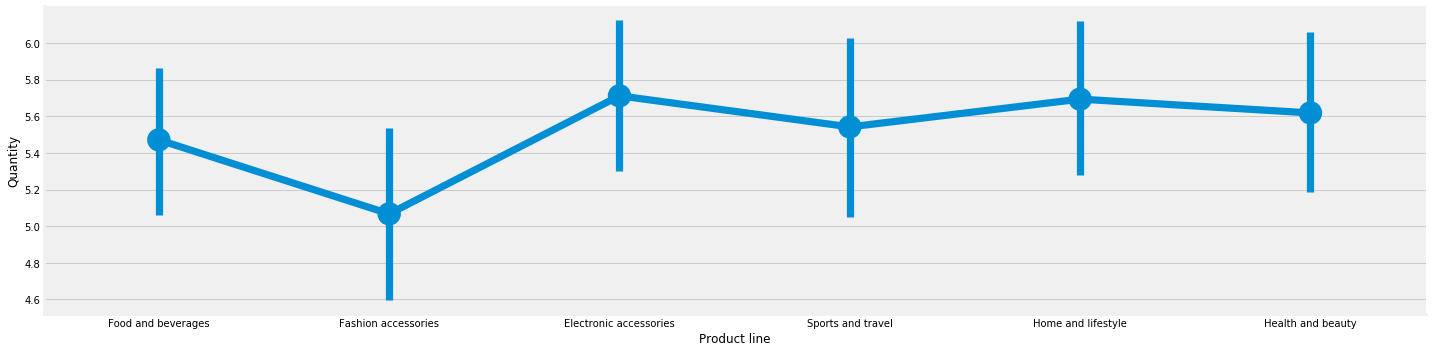

In [59]:
sns.catplot('Product line', 'Quantity', data=data, aspect=4, kind='point')

### Insights
- Electronics has the lowest unit price while fashion accessories has the highest unit price
- Electronics has the highest quantity purchased (probably due to its lowest unit price) while fashion accessories has the lowest quantity purchased (opposite reason)

## StandOut Section

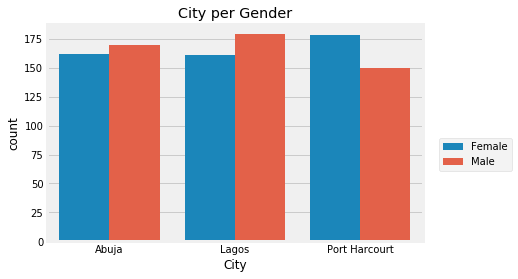

In [60]:
sns.countplot('City', data=data, hue='Gender').set_title('City per Gender')
plt.legend(loc='center ', bbox_to_anchor=(1.25, 0.5), ncol=1)

- Most customers in Port Harcourt are females

In [61]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

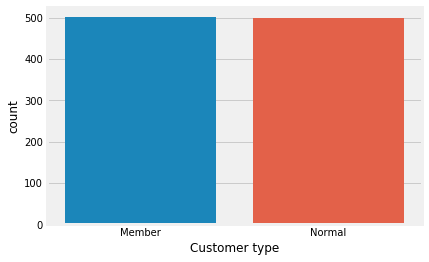

In [62]:
sns.countplot('Customer type', data=data)

In [63]:
data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

- The two customer types are equally distributed

In [64]:
data['Month'].value_counts()

1    352
3    345
2    303
Name: Month, dtype: int64

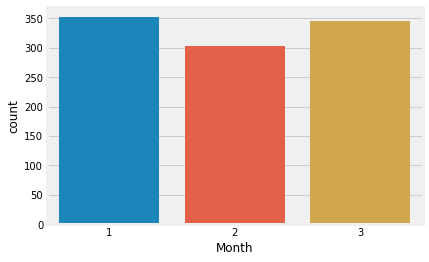

In [65]:
sns.countplot('Month', data=data)

- All transactions occured within 3 months with most sales record in January, followed by march then February

In [66]:
data['Day'].nunique()

31

## Documentation

- I tried to explain each line of code as comment and markdwon in this notebook
- Further documentation can be found in the read.me of this git repo 